# **Final Exam for Deep Network Development course. First part (mandatory)**

This notebook contains the task to be solved in order to pass the exam.
This is the first part of the exam, which is compolsury in order to get a grade. It contains a task similar to what you have worked on during the semester, which consists on implementing a network architecture and a function.

Please note that, to **PASS** the Deep Network Development course you must **SUBMIT A SUCCESSFUL SOLUTION FOR THE FIRST PART**. If you **FAIL** the first part, you have the right to do the exam **ONE MORE TIME**. If you **FAIL AGAIN**, then unfortunately, you have failed the course. If you **PASS** the first part, then you get the weighted average of your quizzes and assignments as your final grade.

## Your information
Please fill the next cell with your information

**Full Name**:

**Neptun code:**

**Date:** 09/01/2024 9AM-10AM

## Task Description

#### Your task is to implement a custom architecture inspired by a image-to-image Diffusion like model, and the forward function. The model receives an intial image and a text as input (describes how the final image should look like) and generates an image according to the two.

#### Afterwards, make sure to run cell code number 1.2. to check if your implementation is correct.

#### This task should be **SOLVED IN 1 HOUR** and submitted to Canvas (download the .ipynb file). Please note that after 1 hour, the Canvas exam assignment will be closed and you cannot submit your solution.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#### **NO GPU IS NEEDED for this task**. No training nor any computationally expensive operation will be performed. This notebook runs on any computer using a cpu.

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device

## 1. Architecture

#### Please keep in mind that this architecture is purely imagined and should not correspond to any existing model / architecture. You will not find it on the internet.

Please right click the image and "Open image in a new tab" to view it better with zoom. Or download it from here: https://drive.google.com/file/d/11gey3SssCJe6CIUiFON9e-eoLdkegDna/view?usp=drive_link

<br>
<br>

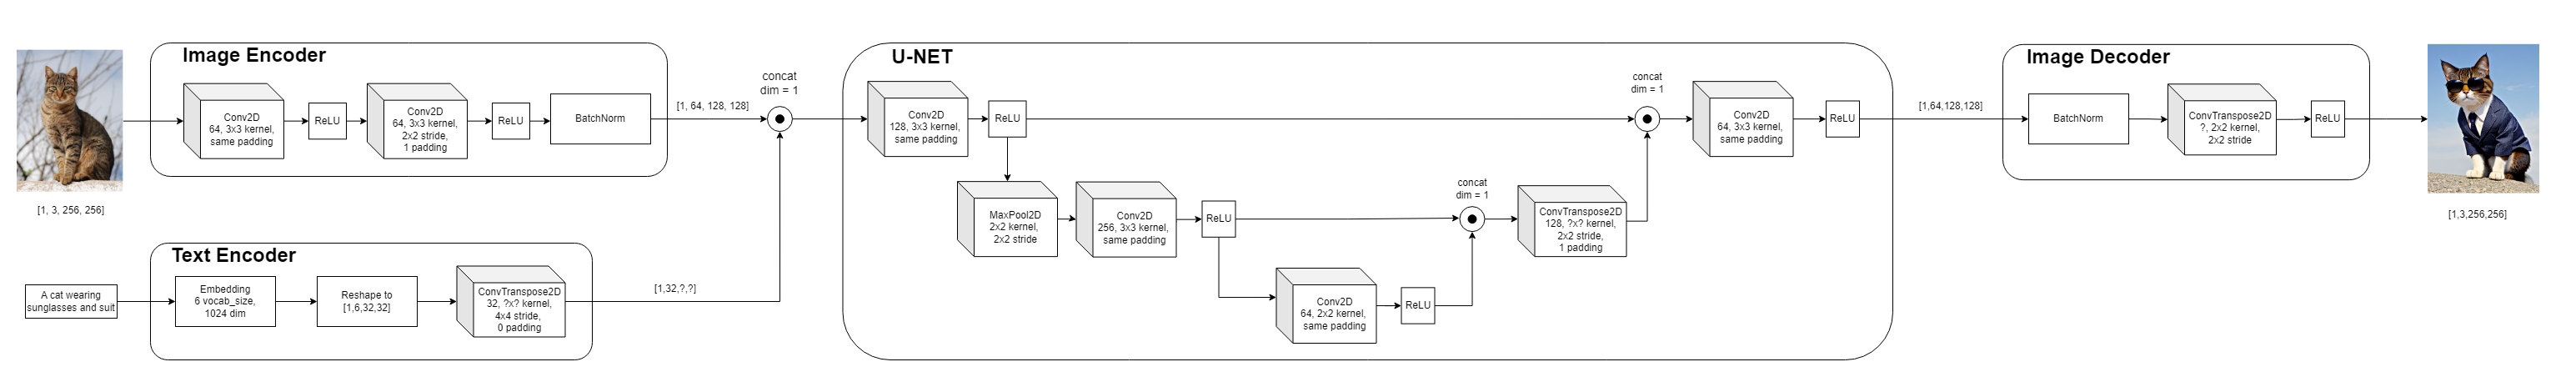

#### Input image

In [2]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

response = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg")
image = Image.open(BytesIO(response.content)).convert('RGB')
image = image.resize((256, 256))
image = np.rollaxis(np.array(image), 2, 0)

In [3]:
image.shape

(3, 256, 256)

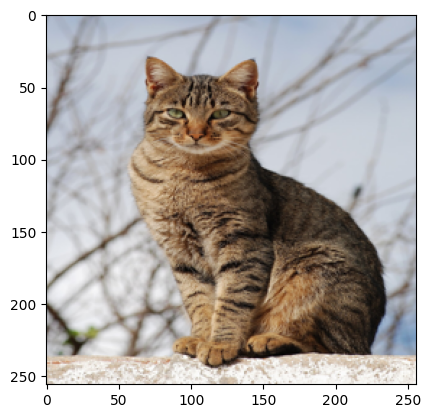

In [4]:
plt.imshow(np.moveaxis(image, 0,-1))

In [5]:
#Simple pre-processing
input_image = torch.tensor(image,dtype=torch.float32)
input_image = torch.unsqueeze(input_image, dim=0)
input_image.size()

torch.Size([1, 3, 256, 256])

#### Input text

In [6]:
text = "A cat wearing sunglasses and suit"

# Simple preprocessing the text
word_to_ix = {"A": 0, "cat": 1, "wearing": 2, "sunglasses": 3, "and": 4, "suit": 5}
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long) # a tensor representing words by integers

vocab_size = len(lookup_tensor)

In [7]:
vocab_size

6

#### 1.1. Implement the architecture

In [9]:
import torch
import torch.nn as nn

class ImageEncoder(nn.Module):
    def __init__(self):
        super(ImageEncoder, self).__init__()
        # Define the convolutional layers, activation functions, and batch normalization
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)  # Same padding
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)  # Stride 2
        self.relu2 = nn.ReLU()
        self.batch_norm = nn.BatchNorm2d(64)

    def forward(self, input_image):
        # Pass the input through the first convolutional layer
        x = self.conv1(input_image)
        print("1st Convolutional Layer: ", x.shape)
        x = self.relu1(x)
        print("ReLU Activation: ", x.shape)
        # Pass the result through the second convolutional layer
        x = self.conv2(x)
        print("2nd Convolutional Layer: ", x.shape)
        x = self.relu2(x)
        print("ReLU Activation: ", x.shape)
        # Apply batch normalization
        x = self.batch_norm(x)
        print("Batch Normalization: ", x.shape)
        return x

class TextEncoder(nn.Module):
    def __init__(self):
        super(TextEncoder, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(6, 1024)
        # ConvTranspose2D layer
        self.conv_transpose = nn.ConvTranspose2d(
            in_channels=6,  # Based on reshaped embedding dimension [1, 6, 32, 32]
            out_channels=32,
            kernel_size=4,
            stride=4,
            padding=0
        )

    def forward(self, input_text):
        # Embed the input text
        x = self.embedding(input_text)  # Shape: [batch_size, seq_len, embedding_dim]
        print("Embedding Layer: ", x.shape)
        # Reshape to [batch_size, 6, 32, 32]
        x = x.view(x.size(0), 6, 32, 32)
        print("Reshaped Embedding: ", x.shape)
        # Apply ConvTranspose2D
        x = self.conv_transpose(x)
        print("ConvTranspose2D: ", x.shape)
        return x

encoder = ImageEncoder()
input_image = torch.randn(1, 3, 256, 256)  # Simulating the input image
features = encoder(input_image)
print(features.shape)

word_to_ix = {"A": 0, "cat": 1, "wearing": 2, "sunglasses": 3, "and": 4, "suit": 5}
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long)  # Sequence: [0, 1, 2, 3, 4, 5]
vocab_size = len(word_to_ix)
embedding_dim = 1024
out_channels = 32

# Create the TextEncoder instance
text_encoder = TextEncoder()
# Simulate input text
input_text = lookup_tensor.unsqueeze(0)  # Add batch dimension
# Forward pass
output = text_encoder(input_text)
print(output.shape)  # Should be [1, 32, 128, 128]


1st Convolutional Layer:  torch.Size([1, 64, 256, 256])
ReLU Activation:  torch.Size([1, 64, 256, 256])
2nd Convolutional Layer:  torch.Size([1, 64, 128, 128])
ReLU Activation:  torch.Size([1, 64, 128, 128])
Batch Normalization:  torch.Size([1, 64, 128, 128])
torch.Size([1, 64, 128, 128])
Embedding Layer:  torch.Size([1, 6, 1024])
Reshaped Embedding:  torch.Size([1, 6, 32, 32])
ConvTranspose2D:  torch.Size([1, 32, 128, 128])
torch.Size([1, 32, 128, 128])


In [16]:
import torch
import torch.nn as nn

class MyUNet(nn.Module):
    def __init__(self):
        super(MyUNet, self).__init__()
        
        # Downscaling part
        self.conv1 = nn.Conv2d(96, 128, kernel_size=3, padding=1)  # Conv2D 128
        self.relu1 = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPool 2x2
        self.conv2 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # Conv2D 256
        self.relu2 = nn.ReLU()

        # Bottleneck
        self.conv3 = nn.Conv2d(256, 64, kernel_size=3, padding=1)  # Conv2D 64
        self.relu3 = nn.ReLU()

        # Upscaling part
        self.conv_transpose = nn.ConvTranspose2d(320, 128, kernel_size=2, stride=2, padding=0)  # Upsampling


        # Output layer
        self.output_conv = nn.Conv2d(256, 64, kernel_size=3, padding=1)  # Conv2D 64 to out_channels
        self.relu5 = nn.ReLU()

    def forward(self, combined_features):
        # Downscaling
        x1 = self.conv1(combined_features)  # [1, 128, 128, 128]
        print("Conv1: ", x1.shape)
        x1 = self.relu1(x1)
        print("ReLU1: ", x1.shape)
        x2 = self.maxpool(x1)  # [1, 128, 64, 64]
        print("MaxPool: ", x2.shape)
        x2 = self.conv2(x2)  # [1, 256, 64, 64]
        print("Conv2: ", x2.shape)
        x2 = self.relu2(x2)
        print("ReLU2: ", x2.shape)

        # Bottleneck
        x3 = self.conv3(x2)  # [1, 64, 64, 64]
        print("Conv3: ", x3.shape)
        x3 = self.relu3(x3)
        print("ReLU3: ", x3.shape)

        first_com = torch.cat((x2, x3), dim=1)
        print("Concatenation: ", first_com.shape)
        # Upscaling
        x4 = self.conv_transpose(first_com)  # [1, 128, 128, 128]
        print("ConvTranspose: ", x4.shape)
        x5 = torch.cat((x1, x4), dim=1)  # Concatenate along channel dimension, [1, 256, 128, 128]
        print("Concatenation: ", x5.shape)

        # Output
        x6 = self.output_conv(x5)  # [1, out_channels, 128, 128]
        print("Output Conv: ", x6.shape)
        x6 = self.relu5(x6)
        print("Output ReLU: ", x6.shape)

        return x6


# Initialize the model
model = MyUNet()
# Create a sample input tensor
combined_features = torch.randn(1, 96, 128, 128)  # Input size: [1, 96, 128, 128]
# Forward pass
output = model(combined_features)
print(output.shape)  # Expected output size: [1, 64, 128, 128]


Conv1:  torch.Size([1, 128, 128, 128])
ReLU1:  torch.Size([1, 128, 128, 128])
MaxPool:  torch.Size([1, 128, 64, 64])
Conv2:  torch.Size([1, 256, 64, 64])
ReLU2:  torch.Size([1, 256, 64, 64])
Conv3:  torch.Size([1, 64, 64, 64])
ReLU3:  torch.Size([1, 64, 64, 64])
Concatenation:  torch.Size([1, 320, 64, 64])
ConvTranspose:  torch.Size([1, 128, 128, 128])
Concatenation:  torch.Size([1, 256, 128, 128])
Output Conv:  torch.Size([1, 64, 128, 128])
Output ReLU:  torch.Size([1, 64, 128, 128])
torch.Size([1, 64, 128, 128])


In [17]:
class ImageDecoder(nn.Module):
    def __init__(self):
        super(ImageDecoder, self).__init__()
        # Define BatchNorm2D
        self.batch_norm = nn.BatchNorm2d(64)
        # Define ConvTranspose2D layer
        self.conv_transpose = nn.ConvTranspose2d(
            in_channels=64,
            out_channels=3,
            kernel_size=2,
            stride=2,
            padding=0
        )
        # Define ReLU activation
        self.relu = nn.ReLU()

    def forward(self, image_features):
        # Apply BatchNorm2D
        x = self.batch_norm(image_features)
        print("Batch Normalization: ", x.shape)
        # Apply ConvTranspose2D
        x = self.conv_transpose(x)
        print("ConvTranspose2D: ", x.shape)
        # Apply ReLU activation
        x = self.relu(x)
        print("ReLU Activation: ", x.shape)
        return x
decoder = ImageDecoder()
# Input tensor with size [1, 64, 128, 128]
image_features = torch.randn(1, 64, 128, 128)
# Forward pass
output = decoder(image_features)
print(output.shape) 


Batch Normalization:  torch.Size([1, 64, 128, 128])
ConvTranspose2D:  torch.Size([1, 3, 256, 256])
ReLU Activation:  torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


In [20]:
class ImageEncoder(nn.Module):
    def __init__(self):
        super(ImageEncoder, self).__init__()
        # Define the convolutional layers, activation functions, and batch normalization
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)  # Same padding
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)  # Stride 2
        self.relu2 = nn.ReLU()
        self.batch_norm = nn.BatchNorm2d(64)

    def forward(self, input_image):
        # Pass the input through the first convolutional layer
        x = self.conv1(input_image)
        print("1st Convolutional Layer: ", x.shape)
        x = self.relu1(x)
        print("ReLU Activation: ", x.shape)
        # Pass the result through the second convolutional layer
        x = self.conv2(x)
        print("2nd Convolutional Layer: ", x.shape)
        x = self.relu2(x)
        print("ReLU Activation: ", x.shape)
        # Apply batch normalization
        x = self.batch_norm(x)
        print("Batch Normalization: ", x.shape)
        return x

class TextEncoder(nn.Module):
    def __init__(self):
        super(TextEncoder, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(6, 1024)
        # ConvTranspose2D layer
        self.conv_transpose = nn.ConvTranspose2d(
            in_channels=6,  # Based on reshaped embedding dimension [1, 6, 32, 32]
            out_channels=32,
            kernel_size=4,
            stride=4,
            padding=0
        )

    def forward(self, input_text):
        input_text = lookup_tensor.unsqueeze(0)  # Add batch dimension
        # Embed the input text
        x = self.embedding(input_text)  # Shape: [batch_size, seq_len, embedding_dim]
        print("Embedding Layer: ", x.shape)
        # Reshape to [batch_size, 6, 32, 32]
        x = x.view(x.size(0), 6, 32, 32)
        print("Reshaped Embedding: ", x.shape)
        # Apply ConvTranspose2D
        x = self.conv_transpose(x)
        print("ConvTranspose2D: ", x.shape)
        return x
    
import torch
import torch.nn as nn

class MyUNet(nn.Module):
    def __init__(self):
        super(MyUNet, self).__init__()
        
        # Downscaling part
        self.conv1 = nn.Conv2d(96, 128, kernel_size=3, padding=1)  # Conv2D 128
        self.relu1 = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPool 2x2
        self.conv2 = nn.Conv2d(128, 256, kernel_size=3, padding=1)  # Conv2D 256
        self.relu2 = nn.ReLU()

        # Bottleneck
        self.conv3 = nn.Conv2d(256, 64, kernel_size=3, padding=1)  # Conv2D 64
        self.relu3 = nn.ReLU()

        # Upscaling part
        self.conv_transpose = nn.ConvTranspose2d(320, 128, kernel_size=2, stride=2, padding=0)  # Upsampling


        # Output layer
        self.output_conv = nn.Conv2d(256, 64, kernel_size=3, padding=1)  # Conv2D 64 to out_channels
        self.relu5 = nn.ReLU()

    def forward(self, combined_features):
        # Downscaling
        x1 = self.conv1(combined_features)  # [1, 128, 128, 128]
        print("Conv1: ", x1.shape)
        x1 = self.relu1(x1)
        print("ReLU1: ", x1.shape)
        x2 = self.maxpool(x1)  # [1, 128, 64, 64]
        print("MaxPool: ", x2.shape)
        x2 = self.conv2(x2)  # [1, 256, 64, 64]
        print("Conv2: ", x2.shape)
        x2 = self.relu2(x2)
        print("ReLU2: ", x2.shape)

        # Bottleneck
        x3 = self.conv3(x2)  # [1, 64, 64, 64]
        print("Conv3: ", x3.shape)
        x3 = self.relu3(x3)
        print("ReLU3: ", x3.shape)

        first_com = torch.cat((x2, x3), dim=1)
        print("Concatenation: ", first_com.shape)
        # Upscaling
        x4 = self.conv_transpose(first_com)  # [1, 128, 128, 128]
        print("ConvTranspose: ", x4.shape)
        x5 = torch.cat((x1, x4), dim=1)  # Concatenate along channel dimension, [1, 256, 128, 128]
        print("Concatenation: ", x5.shape)

        # Output
        x6 = self.output_conv(x5)  # [1, out_channels, 128, 128]
        print("Output Conv: ", x6.shape)
        x6 = self.relu5(x6)
        print("Output ReLU: ", x6.shape)

        return x6
class ImageDecoder(nn.Module):
    def __init__(self):
        super(ImageDecoder, self).__init__()
        # Define BatchNorm2D
        self.batch_norm = nn.BatchNorm2d(64)
        # Define ConvTranspose2D layer
        self.conv_transpose = nn.ConvTranspose2d(
            in_channels=64,
            out_channels=3,
            kernel_size=2,
            stride=2,
            padding=0
        )
        # Define ReLU activation
        self.relu = nn.ReLU()

    def forward(self, image_features):
        # Apply BatchNorm2D
        x = self.batch_norm(image_features)
        print("Batch Normalization: ", x.shape)
        # Apply ConvTranspose2D
        x = self.conv_transpose(x)
        print("ConvTranspose2D: ", x.shape)
        # Apply ReLU activation
        x = self.relu(x)
        print("ReLU Activation: ", x.shape)
        return x

class ImageToImageGenerator(nn.Module):
    def __init__(self, vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels):
        super(ImageToImageGenerator, self).__init__()
        
        # Define the Text Encoder
        self.text_encoder = TextEncoder()
        
        # Define the Image Encoder
        self.image_encoder = ImageEncoder()
        
        # Define the U-Net
        self.unet = MyUNet()
        
        # Define the Image Decoder
        self.image_decoder = ImageDecoder()

    def forward(self, input_text, input_image):
        # Process the input text through the Text Encoder
        text_features = self.text_encoder(input_text)
        print("Text Encoder Output: ", text_features.shape)
        
        # Process the input image through the Image Encoder
        image_features = self.image_encoder(input_image)
        print("Image Encoder Output: ", image_features.shape)
        
        # Combine the text features and image features
        combined_features = torch.cat((text_features, image_features), dim=1)
        print("Combined Features: ", combined_features.shape)
        
        # Process the combined features through the U-Net
        unet_features = self.unet(combined_features)
        print("U-Net Output: ", unet_features.shape)
        
        # Process the U-Net output through the Image Decoder
        generated_image = self.image_decoder(unet_features)
        print("Generated Image: ", generated_image.shape)
        
        return generated_image

#### 1.2. Test your implementation
Expected output

torch.Size( [1, 3, 256, 256] )

In [21]:
embedding_dim = 1024
image_channels = 3
text_encoder_out_channels = 32
image_encoder_out_channels = 64
unet_out_channels = 64
model = ImageToImageGenerator(vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels)

input_text = lookup_tensor

# Forward pass
output = model(input_text, input_image)
print('----------------------------------------------------------------')
print("Output Image Shape:", output.shape)

Embedding Layer:  torch.Size([1, 6, 1024])
Reshaped Embedding:  torch.Size([1, 6, 32, 32])
ConvTranspose2D:  torch.Size([1, 32, 128, 128])
Text Encoder Output:  torch.Size([1, 32, 128, 128])
1st Convolutional Layer:  torch.Size([1, 64, 256, 256])
ReLU Activation:  torch.Size([1, 64, 256, 256])
2nd Convolutional Layer:  torch.Size([1, 64, 128, 128])
ReLU Activation:  torch.Size([1, 64, 128, 128])
Batch Normalization:  torch.Size([1, 64, 128, 128])
Image Encoder Output:  torch.Size([1, 64, 128, 128])
Combined Features:  torch.Size([1, 96, 128, 128])
Conv1:  torch.Size([1, 128, 128, 128])
ReLU1:  torch.Size([1, 128, 128, 128])
MaxPool:  torch.Size([1, 128, 64, 64])
Conv2:  torch.Size([1, 256, 64, 64])
ReLU2:  torch.Size([1, 256, 64, 64])
Conv3:  torch.Size([1, 64, 64, 64])
ReLU3:  torch.Size([1, 64, 64, 64])
Concatenation:  torch.Size([1, 320, 64, 64])
ConvTranspose:  torch.Size([1, 128, 128, 128])
Concatenation:  torch.Size([1, 256, 128, 128])
Output Conv:  torch.Size([1, 64, 128, 128])


For fun -- check the generated image, it should look something like this: https://drive.google.com/file/d/1qCCmxt5FKdOrGrFkajti9_UFvZAPaSHA/view?usp=sharing

<br>
<br>

![](https://drive.google.com/uc?export=view&id=1qCCmxt5FKdOrGrFkajti9_UFvZAPaSHA)
